In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. EDA

In [2]:
train = pd.read_csv("./train.csv",encoding='latin-1')
print('dataset shape:', train.shape)
train.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
# 극 불균형 상태임을 확인

print(train['TARGET'].value_counts())

unsatisfied_cnt = train[train['TARGET'] == 1]['TARGET'].count()
total_cnt = train['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
# 모두 수치형 변수

train.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# 2. 데이터 전처리

In [6]:
print(train['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [7]:
# var3 피처 값 대체 및 ID 피처 드롭
train['var3'].replace(-999999, 2, inplace=True)
train.drop('ID', axis=1, inplace=True)

# 3. 모델링

In [8]:
y = train['TARGET']
y.shape

(76020,)

In [9]:
X = train.drop(['TARGET'], axis=1)
X.shape

(76020, 369)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


# 4. 언더 샘플링¶


### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
import sklearn.metrics as metrics

In [12]:
from imblearn.under_sampling import *

### Random Under Sampling

- 다수클래스 데이터 중에서 무작위로 선별하여 제거.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [16]:
X_train, y_train = RandomUnderSampler().fit_sample(X_train, y_train)

In [17]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4812, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
1    0.5
0    0.5
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


## BaysianOptimization

In [18]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [20]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [21]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.840734	valid_0's binary_logloss: 0.517491
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.840766	valid_0's binary_logloss: 0.517737
best_iter: 99
roc_auc: 0.8407661354358684
|  1        |  0.8408   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, '

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 37, 'colsample_bytree': 0.9306368742048947, 'subsample': 0.9299529005082734, 'max_depth': 7, 'reg_alpha': 0.19637994851163287, 'reg_lambda': 0.1750667333739045, 'min_split_gain': 0.058336100242476395, 'min_child_weight': 22.935679282856086, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.839625	valid_0's binary_logloss: 0.514414
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.839639	valid_0's binary_logloss: 0.514954
best_iter: 98
roc_auc: 0.8396393954134532
|  11       |  0.8396   |  0.9306   |  7.481    |  22.94    |  0.05834  |  36.61    |  0.1964   |  0.1751   |  0.93     |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 43, 'colsample_bytree': 0.792985541295224, 'subsample': 0.6861540787879228, 'max_depth': 11, 'reg_alpha': 0.09854595285010953, 'reg_lambda': 0.34131373291389805, 'min_split_gain': 0.031081060947158217, 'min_c

In [22]:
BO_lgb.max

{'target': 0.8423118550637718,
 'params': {'colsample_bytree': 0.7938575367700749,
  'max_depth': 5.053212004372854,
  'min_child_weight': 11.306184037494198,
  'min_split_gain': 0.0076985060011006265,
  'num_leaves': 44.47965199442237,
  'reg_alpha': 0.40445613739603187,
  'reg_lambda': 0.30440629345289194,
  'subsample': 0.5435940695073487}}

In [23]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.757584	valid_0's binary_logloss: 0.688865
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.820464	valid_0's binary_logloss: 0.682817
[3]	valid_0's auc: 0.827945	valid_0's binary_logloss: 0.677153
[4]	valid_0's auc: 0.821919	valid_0's binary_logloss: 0.673323
[5]	valid_0's auc: 0.827135	valid_0's binary_logloss: 0.66772
[6]	valid_0's auc: 0.829388	valid_0's binary_logloss: 0.662284
[7]	valid_0's auc: 0.831372	valid_0's binary_logloss: 0.657044
[8]	valid_0's auc: 0.83202	valid_0's binary_logloss: 0.65217
[9]	valid_0's auc: 0.832292	valid_0's binary_logloss: 0.647317
[10]	valid_0's auc: 0.833469	valid_0's binary_logloss: 0.642749
[11]	valid_0's auc: 0.833828	valid_0's binary_logloss: 0.638247
[12]	valid_0's auc: 0.833744	valid_0's binary_logloss: 0.633942
[13]	valid_0's auc: 0.834354	valid_0's binary_logloss: 0.629832
[14]	valid_0's auc: 0.83447	valid_0's binary_logloss: 0.626155
[15]	valid_0's auc: 0.834674	valid_0's binary_logloss: 

[142]	valid_0's auc: 0.84375	valid_0's binary_logloss: 0.506314
[143]	valid_0's auc: 0.843807	valid_0's binary_logloss: 0.506217
[144]	valid_0's auc: 0.843919	valid_0's binary_logloss: 0.506047
[145]	valid_0's auc: 0.843991	valid_0's binary_logloss: 0.505915
[146]	valid_0's auc: 0.843999	valid_0's binary_logloss: 0.505812
[147]	valid_0's auc: 0.843962	valid_0's binary_logloss: 0.505717
[148]	valid_0's auc: 0.844111	valid_0's binary_logloss: 0.505545
[149]	valid_0's auc: 0.84421	valid_0's binary_logloss: 0.505403
[150]	valid_0's auc: 0.844262	valid_0's binary_logloss: 0.505262
[151]	valid_0's auc: 0.844288	valid_0's binary_logloss: 0.505138
[152]	valid_0's auc: 0.844224	valid_0's binary_logloss: 0.505071
[153]	valid_0's auc: 0.844164	valid_0's binary_logloss: 0.505006
[154]	valid_0's auc: 0.844228	valid_0's binary_logloss: 0.504973
[155]	valid_0's auc: 0.844269	valid_0's binary_logloss: 0.504922
[156]	valid_0's auc: 0.844315	valid_0's binary_logloss: 0.504761
[157]	valid_0's auc: 0.8443

[308]	valid_0's auc: 0.845372	valid_0's binary_logloss: 0.501062
[309]	valid_0's auc: 0.845318	valid_0's binary_logloss: 0.501084
[310]	valid_0's auc: 0.845329	valid_0's binary_logloss: 0.501077
[311]	valid_0's auc: 0.84532	valid_0's binary_logloss: 0.501044
[312]	valid_0's auc: 0.845335	valid_0's binary_logloss: 0.501074
[313]	valid_0's auc: 0.845352	valid_0's binary_logloss: 0.501072
[314]	valid_0's auc: 0.845329	valid_0's binary_logloss: 0.501065
[315]	valid_0's auc: 0.84529	valid_0's binary_logloss: 0.501024
[316]	valid_0's auc: 0.845302	valid_0's binary_logloss: 0.501013
[317]	valid_0's auc: 0.845284	valid_0's binary_logloss: 0.500997
[318]	valid_0's auc: 0.845288	valid_0's binary_logloss: 0.500984
[319]	valid_0's auc: 0.845247	valid_0's binary_logloss: 0.501023
[320]	valid_0's auc: 0.845202	valid_0's binary_logloss: 0.501049
[321]	valid_0's auc: 0.845189	valid_0's binary_logloss: 0.501036
[322]	valid_0's auc: 0.845198	valid_0's binary_logloss: 0.501022
[323]	valid_0's auc: 0.8451

In [24]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.7938575367700749, learning_rate=0.02,
               max_depth=5, min_child_weight=11.306184037494198,
               min_split_gain=0.0076985060011006265, n_estimators=1000,
               num_leaves=44, reg_alpha=0.40445613739603187,
               reg_lambda=0.30440629345289194, subsample=0.5435940695073487)

In [25]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7938575367700749, learning_rate=0.02,
               max_depth=5, min_child_weight=11.306184037494198,
               min_split_gain=0.0076985060011006265, n_estimators=1000,
               num_leaves=44, reg_alpha=0.40445613739603187,
               reg_lambda=0.30440629345289194, subsample=0.5435940695073487)

In [29]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    roc_auc_score = metrics.roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}, ROC_AUC_Score: {3: 4f}'.format(accuracy , precision ,recall, f1_score, roc_auc_score))

In [27]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_bayes_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (15204, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.69810474 0.30189526]
 [0.95620636 0.04379364]
 [0.85403558 0.14596442]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.69810474 0.30189526 0.69810474 0.30189526]
 [0.95620636 0.04379364 0.95620636 0.04379364]
 [0.85403558 0.14596442 0.85403558 0.14596442]]


In [30]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[11135  3467]
 [  137   465]]
정확도: 0.7630, 정밀도: 0.1183, 재현율: 0.7724, F1_score:  0.772425, ROC_AUC_Score:  0.205117


In [31]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

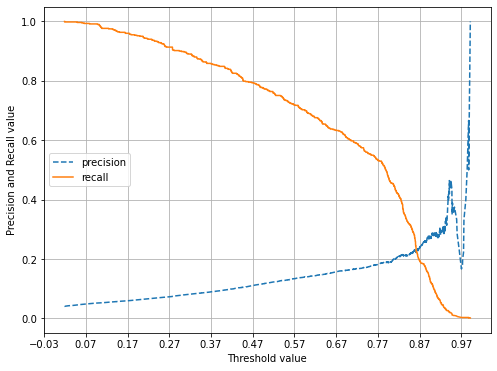

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ) ####


In [34]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.819, 0.2789)

In [35]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.819
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[13649   953]
 [  350   252]]
정확도: 0.9143, 정밀도: 0.2091, 재현율: 0.4186, F1_score:  0.418605, ROC_AUC_Score:  0.278915


# 5. 오버 샘플링

In [36]:
from imblearn.over_sampling import *

### Borderline SMOTE

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [38]:
X_train, y_train = BorderlineSMOTE(n_jobs=-1).fit_sample(X_train, y_train)

In [39]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(116820, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
1    0.5
0    0.5
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


## BaysianOptimization

In [40]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [41]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [42]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [43]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.818864	valid_0's binary_logloss: 0.486113
best_iter: 27
roc_auc: 0.8188638997707045
|  1        |  0.8189   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 36, 'colsample_bytree': 0.9818313802505146

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 29, 'colsample_bytree': 0.6096261536747141, 'subsample': 0.5, 'max_depth': 12, 'reg_alpha': 0.0, 'reg_lambda': 0.4927283273348606, 'min_split_gain': 0.001, 'min_child_weight': 46.19470452482036, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.819537	valid_0's binary_logloss: 0.323785
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.819537	valid_0's binary_logloss: 0.323785
best_iter: 100
roc_auc: 0.819537077021716
|  12       |  0.8195   |  0.6096   |  12.0     |  46.19    |  0.001    |  29.13    |  0.0      |  0.4927   |  0.5      |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 36, 'colsample_bytree': 1.0, 'subsample': 0.5, 'max_depth': 4, 'reg_alpha': 0.1584889870961066, 'reg_lambda': 0.07469274264424561, 'min_split_gain': 0.004050889923883039, 'min_child_weight': 49.790912594637206, 'verbosity': -1}
Training until validation

In [44]:
BO_lgb.max

{'target': 0.8243986852026369,
 'params': {'colsample_bytree': 1.0,
  'max_depth': 4.637690794622835,
  'min_child_weight': 5.0,
  'min_split_gain': 0.001,
  'num_leaves': 37.186594168843925,
  'reg_alpha': 0.47976560671784996,
  'reg_lambda': 0.4672166374269592,
  'subsample': 0.5}}

In [45]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.810001	valid_0's binary_logloss: 0.681956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.808409	valid_0's binary_logloss: 0.671286
[3]	valid_0's auc: 0.81075	valid_0's binary_logloss: 0.661017
[4]	valid_0's auc: 0.810779	valid_0's binary_logloss: 0.651084
[5]	valid_0's auc: 0.810817	valid_0's binary_logloss: 0.641506
[6]	valid_0's auc: 0.811211	valid_0's binary_logloss: 0.632338
[7]	valid_0's auc: 0.812419	valid_0's binary_logloss: 0.623338
[8]	valid_0's auc: 0.813642	valid_0's binary_logloss: 0.614693
[9]	valid_0's auc: 0.814373	valid_0's binary_logloss: 0.606337
[10]	valid_0's auc: 0.814181	valid_0's binary_logloss: 0.598242
[11]	valid_0's auc: 0.814861	valid_0's binary_logloss: 0.590496
[12]	valid_0's auc: 0.814851	valid_0's binary_logloss: 0.582938
[13]	valid_0's auc: 0.815953	valid_0's binary_logloss: 0.575684
[14]	valid_0's auc: 0.815874	valid_0's binary_logloss: 0.568659
[15]	valid_0's auc: 0.816024	valid_0's binary_loglos

[137]	valid_0's auc: 0.82427	valid_0's binary_logloss: 0.326454
[138]	valid_0's auc: 0.824198	valid_0's binary_logloss: 0.326138
[139]	valid_0's auc: 0.824281	valid_0's binary_logloss: 0.325746
[140]	valid_0's auc: 0.824247	valid_0's binary_logloss: 0.325223
[141]	valid_0's auc: 0.824219	valid_0's binary_logloss: 0.324766
[142]	valid_0's auc: 0.824107	valid_0's binary_logloss: 0.324453
[143]	valid_0's auc: 0.824123	valid_0's binary_logloss: 0.323954
[144]	valid_0's auc: 0.824052	valid_0's binary_logloss: 0.323671
[145]	valid_0's auc: 0.824078	valid_0's binary_logloss: 0.323202
[146]	valid_0's auc: 0.824005	valid_0's binary_logloss: 0.322735
[147]	valid_0's auc: 0.823922	valid_0's binary_logloss: 0.322454
[148]	valid_0's auc: 0.824031	valid_0's binary_logloss: 0.321991
[149]	valid_0's auc: 0.824105	valid_0's binary_logloss: 0.321548
[150]	valid_0's auc: 0.824026	valid_0's binary_logloss: 0.321276
[151]	valid_0's auc: 0.824097	valid_0's binary_logloss: 0.320845
[152]	valid_0's auc: 0.824

In [46]:
lgbm_clf_bayes_best

LGBMClassifier(learning_rate=0.02, max_depth=5, min_child_weight=5.0,
               min_split_gain=0.001, n_estimators=1000, num_leaves=37,
               reg_alpha=0.47976560671784996, reg_lambda=0.4672166374269592,
               subsample=0.5)

In [47]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02, max_depth=5, min_child_weight=5.0,
               min_split_gain=0.001, n_estimators=1000, num_leaves=37,
               reg_alpha=0.47976560671784996, reg_lambda=0.4672166374269592,
               subsample=0.5)

In [49]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_bayes_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (15204, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.15903079 0.84096921]
 [0.99429056 0.00570944]
 [0.11125579 0.88874421]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.15903079 0.84096921 0.15903079 0.84096921]
 [0.99429056 0.00570944 0.99429056 0.00570944]
 [0.11125579 0.88874421 0.11125579 0.88874421]]


In [50]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[13479  1123]
 [  363   239]]
정확도: 0.9023, 정밀도: 0.1755, 재현율: 0.3970, F1_score:  0.397010, ROC_AUC_Score:  0.243381


In [51]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


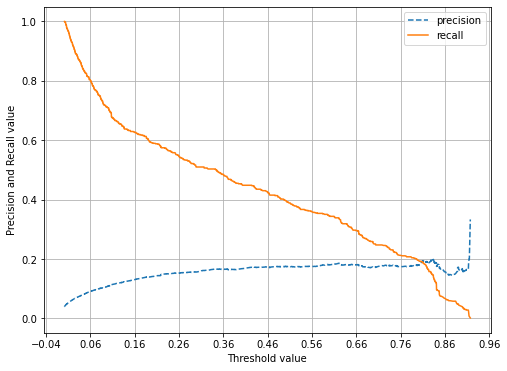

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ) ####


In [54]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.341, 0.2505)

In [55]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.341
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[13088  1514]
 [  299   303]]
정확도: 0.8808, 정밀도: 0.1668, 재현율: 0.5033, F1_score:  0.503322, ROC_AUC_Score:  0.250517


# END